In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import ttest_ind

In [ ]:
# ttest_ind()

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
pairwise_tukeyhsd()

In [3]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split(random_state = 123, "!?!?!?")

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [6]:
df = pd.read_excel("iris_xlsx.xlsx")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [7]:
# X = df.drop("Species", axis = 1)
# X = df.iloc[:, :-1]
X = df.loc[:, :"Petal.Width"]
X.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

#### K-means 주요 파라미터
* `n_clusters`: 군집 개수
* `max_iter`: 최대 반복 연산 횟수
* `tol`: 중심점(centroid) 최소 이동거리(?)
* `random_state`: 랜덤프로세스에서 출력값 고정을 위한 정수(난수 테이블 번호)

In [9]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)

In [10]:
# kmeans.labels_
# kmeans.cluster_centers_

In [15]:
kmeans.labels_[:60]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [16]:
pd.crosstab(df["Species"], kmeans.labels_)

col_0        0   1   2
Species               
setosa       0  50   0
versicolor   2   0  48
virginica   36   0  14

In [18]:
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans = kmeans.fit(X)
pd.crosstab(df["Species"], kmeans.labels_)

col_0        0   1   2
Species               
setosa       0  50   0
versicolor  48   0   2
virginica   14   0  36

In [19]:
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [20]:
df["cluster"] = kmeans.labels_
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1

In [21]:
df.groupby("cluster").mean()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
cluster                                                      
0            5.901613     2.748387      4.393548     1.433871
1            5.006000     3.428000      1.462000     0.246000
2            6.850000     3.073684      5.742105     2.071053

In [22]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
accuracy_score(df["Species"], kmeans.labels_)

0.0

In [24]:
134/150

0.8933333333333333

In [ ]:
df = pd.read_excel("iris_xlsx.xlsx")
X = df.drop("Species", axis = 1)

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean",
                                  linkage = "ward")
cluster.fit_predict(X)

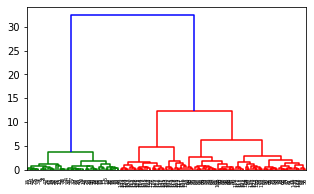

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, "ward")
plt.figure(figsize = (5, 3))
dendrogram(linked)
plt.show()

In [34]:
from statsmodels.formula.api import ols

In [35]:
df = pd.read_csv("linear_regression_01.csv")
df.head()

x  y
0  1  0
1  3  1
2  5  0
3  6  1
4  8  1

In [38]:
model = ols("y ~ x", data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 25 Jun 2020   Prob (F-statistic):             0.0848
Time:                        13:39:33   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.3732x + 0.9909

In [40]:
df = pd.read_csv("bike.csv")
df.head(1)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16

In [43]:
formula = "registered ~ " + " + ".join(["holiday", "temp", "humidity", "windspeed"])
formula

'registered ~ holiday + temp + humidity + windspeed'

In [45]:
model = ols(formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     527.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:                -69102.
No. Observations:               10886   AIC:                         1.382e+05
Df Residuals:                   10881   BIC:                         1.383e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.4446      6.936     21.403      0.000     134.849     162.040
holiday      -18.8170      7.954     -2.366      0.018     -34.409      -3.225
temp           5.8815      0.171     34.481      0.000       5.547       6.216
humidity      -1.8773      0.073    -25.771      0.000      -2.020      -1.735
windspeed      0.3780      0.171      2.205      0.027       0.042       0.714
==============================================================================
Omnibus:                     3345.379   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9703.931
Skew:                           1.620   Prob(JB):                         0.00
Kurtosis:                       6.301   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
df.groupby("holiday")["registered"].mean()

holiday
0    156.094941
1    137.096463
Name: registered, dtype: float64

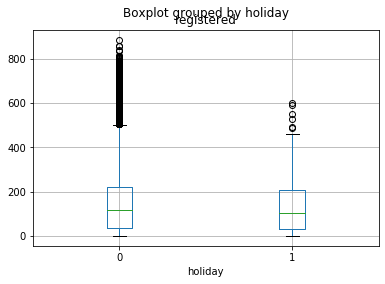

In [49]:
df.boxplot(column = "registered", by = "holiday")

In [50]:
model.resid

0        -41.256246
1        -19.310733
2        -24.310733
3        -55.520113
4        -64.520113
5        -66.789091
6        -51.310733
7        -33.224041
8        -58.520113
9        -76.934099
10       -79.827121
11       -60.374911
12       -57.352629
13       -84.762152
14       -60.384834
15       -47.552772
16       -51.343392
17       -55.788897
18       -64.945036
19       -59.945036
20       -62.999523
21       -55.487715
22       -57.103707
23       -77.725173
24       -88.725173
25       -68.503993
26       -61.174471
27       -83.815010
28       -86.815010
29      -110.729948
            ...    
10856    349.961884
10857    170.450076
10858    116.185612
10859     11.940249
10860    -11.444326
10861    -60.713304
10862    -71.270943
10863    -87.030676
10864    -94.207851
10865    -68.743871
10866    -62.921047
10867    -43.611915
10868     41.210909
10869    286.256129
10870    619.361325
10871    231.187942
10872     50.155737
10873     19.803845
10874     52.292038


In [51]:
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [ ]:
df_sub = df.iloc[:, :4]
df_sub.head(2)

In [55]:
df_sub_dum1 = pd.get_dummies(df_sub, columns = ["season"])
df_sub_dum1.head(2)

datetime  holiday  workingday  season_1  season_2  season_3  \
0  2011-01-01 00:00:00        0           0         1         0         0   
1  2011-01-01 01:00:00        0           0         1         0         0   

   season_4  
0         0  
1         0

In [56]:
df_sub_dum2 = pd.get_dummies(df_sub, columns = ["season"], drop_first = True)
df_sub_dum2.head(2)

datetime  holiday  workingday  season_2  season_3  season_4
0  2011-01-01 00:00:00        0           0         0         0         0
1  2011-01-01 01:00:00        0           0         0         0         0

In [57]:
model.predict()

In [62]:
from statsmodels.formula.api import ols

In [58]:
df = pd.read_csv("bike.csv")
formula = "registered ~ " + " + ".join(["holiday", "temp", "humidity", "windspeed"])
model = ols(formula, data = df).fit()

In [ ]:
df["pred"] = model.predict(df)
df.head(1)

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=df["registered"], y_pred=df["pred"]) ** 0.5

138.22119410195555

### Q. 휴일이면서, 기온이 25도, 습도가 40%, 풍속이 3m/s인 경우 정기권 이용자의 자전거 대여 수(registered)의 예측값은 어떻게 되는가? 결과값을 반올림하여 1의자리 까지 표기하시오 ~ 15:15

In [67]:
df_1samp = pd.DataFrame({"holiday": [1],
                         "temp": [25],
                         "humidity": [40],
                         "windspeed": [3]})
df_1samp

holiday  temp  humidity  windspeed
0        1    25        40          3

In [69]:
model.predict(df_1samp).round()

0    203.0
dtype: float64

In [70]:
df = pd.read_csv("diabetes.csv")
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [72]:
from statsmodels.api import Logit

In [73]:
model = Logit(df["Outcome"], df.drop("Outcome", axis = 1)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                 0.05922
Time:                        15:34:18   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [76]:
model2 = Logit(df["Outcome"], 
               df.drop(["Outcome", "SkinThickness", "BMI", "Insulin"], axis = 1)).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.609329
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                 0.05793
Time:                        15:37:54   Log-Likelihood:                -467.96
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.466e-12
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1274      0.029      4.460      0.000       0.071       0.183
Glucose                      0.0132      0.002      5.608      0.000       0.009       0.018
BloodPressure               -0.0315      0.004     -7.699      0.000      -0.040      -0.024
DiabetesPedigreeFunction     0.3293      0.233      1.414      0.157      -0.127       0.786
Age                         -0.0168      0.008     -2.003      0.045      -0.033      -0.000
============================================================================================
"""

In [79]:
pred = model2.predict(df.drop(["Outcome", "SkinThickness", "BMI", "Insulin"],
                              axis = 1))

In [96]:
df["pred"] = pred
df["pred_class"] = (df["pred"] >= 0.5) + 0

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(df["Outcome"], df["pred_class"])

0.6966145833333334

In [99]:
round(np.exp(0.1274), 3)

1.136

In [100]:
from sklearn.metrics import f1_score

In [101]:
f1_score(df["Outcome"], df["pred_class"])

0.4668192219679634

In [103]:
pd.crosstab(df["Outcome"], df["pred_class"])

pred_class    0    1
Outcome             
0           433   67
1           166  102

In [104]:
from sklearn import tree

In [105]:
df = pd.read_csv("classification_data_01.csv")
df.head(2)

Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0

In [106]:
df["Class"].unique()

array([0, 1], dtype=int64)

In [109]:
model = tree.DecisionTreeClassifier().fit(df.drop("Class", axis = 1),
                                          df["Class"])

In [116]:
pred_class = model.predict(df.drop("Class", axis = 1))
pd.Series(pred_class).value_counts()

0    762
1    610
dtype: int64

In [117]:
pd.crosstab(df["Class"], pred_class)

col_0    0    1
Class          
0      762    0
1        0  610

In [118]:
accuracy_score(df["Class"], pred_class)

1.0

In [119]:
f1_score(df["Class"], pred_class)

1.0

In [120]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [121]:
recall_score(df["Class"], pred_class)

1.0

In [122]:
precision_score(df["Class"], pred_class)

1.0

In [129]:
model2 = tree.DecisionTreeClassifier(max_depth=3).fit(df.drop("Class", axis = 1),
                                                      df["Class"])
pred_class = model2.predict(df.drop("Class", axis = 1))
pd.crosstab(df["Class"], pred_class)

col_0    0    1
Class          
0      723   39
1       45  565